

# <div align="center"> <span style="color: blue;"> ***Pharmaceutical Supply Chain Optimization Dashboard for Sun Pharma Using Advanced Data Science and Machine Learning Techniques*** </span></div>

***


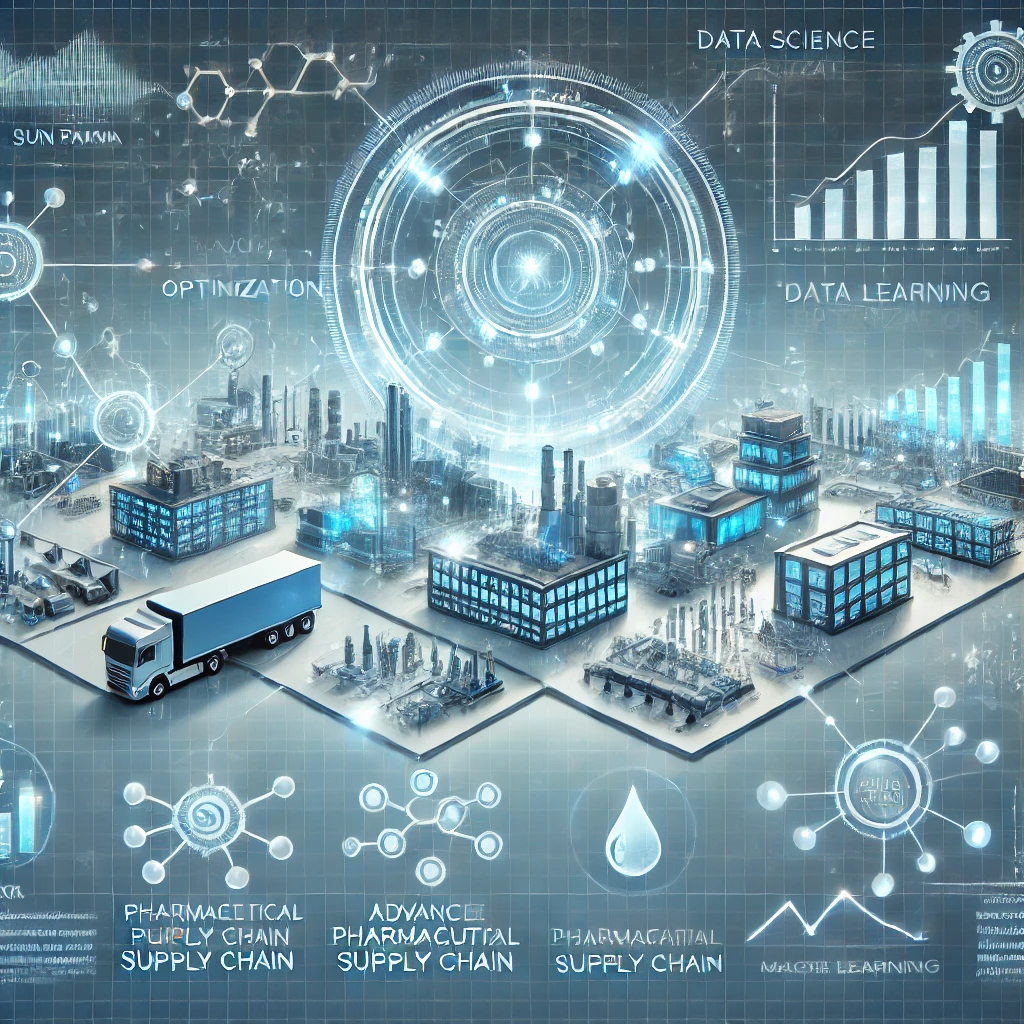

In [3]:
import os
os.chdir("C:\\Users\\USER\\Desktop\\Pharmaceutical Supply Chain Optimization")

In [4]:
import pandas as pd

# Load the CSV file to inspect its structure
file_path = 'C:/Users/USER/Desktop\Pharmaceutical Supply Chain Optimization/Pharmaceutical Supply Chain Optimization - Project 4.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Table 1: Suppliers          46 non-null     object 
 1   Unnamed: 1                  46 non-null     object 
 2   Unnamed: 2                  46 non-null     object 
 3   Unnamed: 3                  46 non-null     object 
 4   Unnamed: 4                  46 non-null     object 
 5   Unnamed: 5                  46 non-null     object 
 6   Unnamed: 6                  0 non-null      float64
 7   Table 2: Inventory          46 non-null     object 
 8   Unnamed: 8                  46 non-null     object 
 9   Unnamed: 9                  46 non-null     object 
 10  Unnamed: 10                 46 non-null     object 
 11  Unnamed: 11                 46 non-null     object 
 12  Unnamed: 12                 46 non-null     object 
 13  Unnamed: 13                 0 non-nul

(  Table 1: Suppliers     Unnamed: 1      Unnamed: 2      Unnamed: 3  \
 0        Supplier_ID  Supplier_Name  Lead_Time_Days  Quality_Rating   
 1             SUP006     PharmaPlus              14             4.3   
 2             SUP007       PackWell               9             4.5   
 3             SUP008       ShipFast               7             4.8   
 4             SUP009     ChemHealth              11             4.1   
 
   Unnamed: 4          Unnamed: 5  Unnamed: 6 Table 2: Inventory  \
 0   Location       Material_Type         NaN         Product_ID   
 1    Chennai  Active Ingredients         NaN             INV006   
 2    Kolkata           Packaging         NaN             INV007   
 3      Noida          Containers         NaN             INV008   
 4    Lucknow  Active Ingredients         NaN             INV009   
 
              Unnamed: 8          Unnamed: 9  ... Unnamed: 30    Unnamed: 31  \
 0          Product_Name  Quantity_Available  ...   Sale_Date  Quantity_Sold

In [5]:
# View the Raw Unprossed data
data

,Table 1: Suppliers,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Table 2: Inventory,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Table 6: Customer Feedback,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,Supplier_ID,Supplier_Name,Lead_Time_Days,Quality_Rating,Location,Material_Type,NaN,Product_ID,Product_Name,Quantity_Available,...,Sale_Date,Quantity_Sold,Revenue,Region,NaN,Feedback_ID,Product_ID,Customer_Rating,Feedback_Date,Comments
1,SUP006,PharmaPlus,14,4.3,Chennai,Active Ingredients,NaN,INV006,Cough Syrup,1300,...,2024-01-27,300,"$1,700",Mumbai,NaN,FB006,INV006,4.3,2024-01-30,"Satisfied, decent packaging."
2,SUP007,PackWell,9,4.5,Kolkata,Packaging,NaN,INV007,Pain Relief Spray,700,...,2024-01-29,150,"$1,200",Kolkata,NaN,FB007,INV007,3.9,2024-02-01,Product is good but arrived late.
3,SUP008,ShipFast,7,4.8,Noida,Containers,NaN,INV008,Antacid Tablets,1200,...,2024-02-01,250,"$2,100",Noida,NaN,FB008,INV008,4.6,2024-02-03,"Highly effective, great quality."
4,SUP009,ChemHealth,11,4.1,Lucknow,Active Ingredients,NaN,INV009,Multivitamin Tablets,1400,...,2024-02-03,200,"$1,600",Lucknow,NaN,FB009,INV009,3.8,2024-02-05,"Quality is fine, delivery slow."
5,SUP010,RawMaterialsHub,19,4.4,Ahmedabad,Raw Materials,NaN,INV010,Calcium Tablets,900,...,2024-02-05,350,"$2,500",Ahmedabad,NaN,FB010,INV010,4.9,2024-02-07,"Excellent, will buy again."
6,SUP011,QuickChem,13,4.6,Indore,Active Ingredients,NaN,INV011,Cold Relief Syrup,600,...,2024-02-07,180,"$1,400",Indore,NaN,FB011,INV011,4.4,2024-02-09,"Effective product, prompt service."
7,SUP012,PackMakers,10,4.7,Coimbatore,Packaging,NaN,INV012,Zinc Tablets,1100,...,2024-02-09,220,"$1,800",Coimbatore,NaN,FB012,INV012,4,2024-02-11,Good value for money.
8,SUP013,SpeedyShip,8,4.9,Surat,Containers,NaN,INV013,Omega 3 Capsules,800,...,2024-02-11,270,"$2,300",Surat,NaN,FB013,INV013,4.7,2024-02-13,"Very satisfied, timely delivery."
9,SUP014,ChemSource,15,4.2,Jaipur,Active Ingredients,NaN,INV014,Iron Tablets,1500,...,2024-02-13,310,"$2,800",Jaipur,NaN,FB014,INV014,3.6,2024-02-15,"Decent quality, packaging issue."


In [6]:
# Extract individual tables from the dataset
tables = {
    "Suppliers": data.iloc[0:46, 0:6].dropna(how='all').reset_index(drop=True),
    "Inventory": data.iloc[0:46, 7:13].dropna(how='all').reset_index(drop=True),
    "Production Orders": data.iloc[0:46, 14:20].dropna(how='all').reset_index(drop=True),
    "Shipments": data.iloc[0:47, 21:27].dropna(how='all').reset_index(drop=True),
    "Sales": data.iloc[0:46, 28:34].dropna(how='all').reset_index(drop=True),
    "Customer Feedback": data.iloc[0:46, 35:40].dropna(how='all').reset_index(drop=True)
}

# Assign column names from the first row and drop that row
for table_name, table_df in tables.items():
    table_df.columns = table_df.iloc[0]  # Set the first row as column headers
    tables[table_name] = table_df[1:].reset_index(drop=True)  # Drop the first row

# Display the cleaned structure of one table as a sample (e.g., Suppliers)
tables["Suppliers"].head()


,Supplier_ID,Supplier_Name,Lead_Time_Days,Quality_Rating,Location,Material_Type
0,SUP006,PharmaPlus,14,4.3,Chennai,Active Ingredients
1,SUP007,PackWell,9,4.5,Kolkata,Packaging
2,SUP008,ShipFast,7,4.8,Noida,Containers
3,SUP009,ChemHealth,11,4.1,Lucknow,Active Ingredients
4,SUP010,RawMaterialsHub,19,4.4,Ahmedabad,Raw Materials


In [7]:
# Display the available column headers in each table
table_headers = {table_name: list(table_df.columns) for table_name, table_df in tables.items()}
table_headers  # Show the headers to identify relationships between tables

{'Suppliers': ['Supplier_ID',
  'Supplier_Name',
  'Lead_Time_Days',
  'Quality_Rating',
  'Location',
  'Material_Type'],
 'Inventory': ['Product_ID',
  'Product_Name',
  'Quantity_Available',
  'Reorder_Level',
  'Warehouse_Location',
  'Supplier_ID'],
 'Production Orders': ['Order_ID',
  'Product_ID',
  'Quantity_Ordered',
  'Order_Date',
  'Completion_Date',
  'Status'],
 'Shipments': ['Shipment_ID',
  'Order_ID',
  'Shipping_Date',
  'Delivery_Date',
  'Shipping_Cost',
  'Delivery_Status'],
 'Sales': ['Sale_ID',
  'Product_ID',
  'Sale_Date',
  'Quantity_Sold',
  'Revenue',
  'Region'],
 'Customer Feedback': ['Feedback_ID',
  'Product_ID',
  'Customer_Rating',
  'Feedback_Date',
  'Comments']}

In [8]:
# Code to join all tables iteratively

# Join Suppliers and Inventory based on SupplierID 
suppliers_inventory = pd.merge(
    tables["Suppliers"],
    tables["Inventory"],
    on="Supplier_ID", 
    how="inner"  
)

# Join the result with Production Orders based on ProductID or OrderID
suppliers_inventory_orders = pd.merge(
    suppliers_inventory,
    tables["Production Orders"],
    on="Product_ID", 
    how="inner"
)

# Join with Shipments based on OrderID
suppliers_inventory_orders_shipments = pd.merge(
    suppliers_inventory_orders,
    tables["Shipments"],
    on="Order_ID", 
    how="inner"
)

# Join with Sales based on ProductID or OrderID
suppliers_inventory_orders_shipments_sales = pd.merge(
    suppliers_inventory_orders_shipments,
    tables["Sales"],
    on="Product_ID", 
    how="inner"
)

# Join with Customer Feedback based on ProductID
final_dataset = pd.merge(
    suppliers_inventory_orders_shipments_sales,
    tables["Customer Feedback"],
    on="Product_ID", 
    how="inner"
)

# Display the unified dataset
print("Unified Dataset:")
print(final_dataset.head())

# Save the dataset for further analysis
final_dataset.to_csv("unified_supply_chain_data.csv", index=False)


Unified Dataset:
0 Supplier_ID    Supplier_Name Lead_Time_Days Quality_Rating   Location  \
0      SUP006       PharmaPlus             14            4.3    Chennai   
1      SUP007         PackWell              9            4.5    Kolkata   
2      SUP008         ShipFast              7            4.8      Noida   
3      SUP009       ChemHealth             11            4.1    Lucknow   
4      SUP010  RawMaterialsHub             19            4.4  Ahmedabad   

0       Material_Type Product_ID          Product_Name Quantity_Available  \
0  Active Ingredients     INV006           Cough Syrup               1300   
1           Packaging     INV007     Pain Relief Spray                700   
2          Containers     INV008       Antacid Tablets               1200   
3  Active Ingredients     INV009  Multivitamin Tablets               1400   
4       Raw Materials     INV010       Calcium Tablets                900   

0 Reorder_Level  ... Delivery_Status Sale_ID   Sale_Date Quantity_Sol

In [9]:
df=final_dataset.copy()

In [10]:
df[['Revenue','Shipping_Cost']].head()

,Revenue,Shipping_Cost
0,"$1,700",$95
1,"$1,200",$115
2,"$2,100",$105
3,"$1,600",$125
4,"$2,500",$100


In [11]:
# Remove special characters (e.g., commas or currency symbols)
df['Revenue'] = df['Revenue'].str.replace(r'[^\d.]', '', regex=True)
df['Shipping_Cost'] = df['Shipping_Cost'].str.replace(r'[^\d.]', '', regex=True)

# Remove leading/trailing whitespace
df['Revenue'] = df['Revenue'].str.strip()
df['Shipping_Cost'] = df['Shipping_Cost'].str.strip()

# # Convert to numeric
# df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')
# df['Shipping_Cost'] = pd.to_numeric(df['Shipping_Cost'], errors='coerce')


In [12]:
# Specify columns for each data type conversion
datetime_columns = ['Order_Date','Completion_Date','Shipping_Date','Delivery_Date','Sale_Date','Feedback_Date']

categorical_columns = ['Supplier_ID', 'Supplier_Name', 'Location', 'Material_Type', 'Product_ID', 'Product_Name','Warehouse_Location', 
                       'Order_ID', 'Status', 'Shipment_ID','Delivery_Status', 'Sale_ID','Region', 'Feedback_ID','Comments',]

numeric_columns = ['Lead_Time_Days', 'Quality_Rating','Quantity_Available', 'Reorder_Level', 'Quantity_Ordered', 'Shipping_Cost', 
                   'Quantity_Sold', 'Revenue', 'Customer_Rating']

# Convert datetime columns
for col in datetime_columns:
  df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert categorical columns
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Convert numeric columns (if they are not already numeric)
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
# for col in numeric_columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# Optional: Display the data types to confirm changes
print(df.dtypes)

0
Supplier_ID                 category
Supplier_Name               category
Lead_Time_Days                 int64
Quality_Rating               float64
Location                    category
Material_Type               category
Product_ID                  category
Product_Name                category
Quantity_Available             int64
Reorder_Level                  int64
Warehouse_Location          category
Order_ID                    category
Quantity_Ordered               int64
Order_Date            datetime64[ns]
Completion_Date       datetime64[ns]
Status                      category
Shipment_ID                 category
Shipping_Date         datetime64[ns]
Delivery_Date         datetime64[ns]
Shipping_Cost                  int64
Delivery_Status             category
Sale_ID                     category
Sale_Date             datetime64[ns]
Quantity_Sold                  int64
Revenue                        int64
Region                      category
Feedback_ID                 category

In [13]:
df['Revenue'].head()

0    1700
1    1200
2    2100
3    1600
4    2500
Name: Revenue, dtype: int64

In [14]:
df.shape, df.head(), df.describe()

((45, 30),
 0 Supplier_ID    Supplier_Name  Lead_Time_Days  Quality_Rating   Location  \
 0      SUP006       PharmaPlus              14             4.3    Chennai   
 1      SUP007         PackWell               9             4.5    Kolkata   
 2      SUP008         ShipFast               7             4.8      Noida   
 3      SUP009       ChemHealth              11             4.1    Lucknow   
 4      SUP010  RawMaterialsHub              19             4.4  Ahmedabad   
 
 0       Material_Type Product_ID          Product_Name  Quantity_Available  \
 0  Active Ingredients     INV006           Cough Syrup                1300   
 1           Packaging     INV007     Pain Relief Spray                 700   
 2          Containers     INV008       Antacid Tablets                1200   
 3  Active Ingredients     INV009  Multivitamin Tablets                1400   
 4       Raw Materials     INV010       Calcium Tablets                 900   
 
 0  Reorder_Level  ... Delivery_Status Sale

### Data Transformation: 
This phase includes filling missing values, encoding categorical variables, and engineering features:

***1. SupplierLeadTime:***

Likely corresponds to Lead_Time_Days since it measures the time associated with suppliers.

***2. ProductionDelay:***

This can be inferred as the difference between Order_Date and Completion_Date. The delay might reflect how long it takes to complete production after the order is placed

***3. SupplierPerformance:***

Likely corresponds to Quality_Rating, which appears to measure supplier performance on quality.

In [17]:
# Code to Prepare These Variables:

# Create derived columns
df['ProductionDelay'] = (pd.to_datetime(df['Completion_Date']) - pd.to_datetime(df['Order_Date'])).dt.days

# Rename columns for consistency
df.rename(columns={
    'Lead_Time_Days': 'SupplierLeadTime',
    'Quality_Rating': 'SupplierPerformance'
}, inplace=True)

# Inspect the dataframe with the new variables
print(df[['SupplierLeadTime', 'ProductionDelay', 'SupplierPerformance']].head())


0  SupplierLeadTime  ProductionDelay  SupplierPerformance
0                14               10                  4.3
1                 9               10                  4.5
2                 7               10                  4.8
3                11               10                  4.1
4                19               10                  4.4


In [18]:
df.columns

Index(['Supplier_ID', 'Supplier_Name', 'SupplierLeadTime',
       'SupplierPerformance', 'Location', 'Material_Type', 'Product_ID',
       'Product_Name', 'Quantity_Available', 'Reorder_Level',
       'Warehouse_Location', 'Order_ID', 'Quantity_Ordered', 'Order_Date',
       'Completion_Date', 'Status', 'Shipment_ID', 'Shipping_Date',
       'Delivery_Date', 'Shipping_Cost', 'Delivery_Status', 'Sale_ID',
       'Sale_Date', 'Quantity_Sold', 'Revenue', 'Region', 'Feedback_ID',
       'Customer_Rating', 'Feedback_Date', 'Comments', 'ProductionDelay'],
      dtype='object', name=0)

# Exploratory Data Analysis (EDA)

In [20]:
# Exploratory Data Analysis (EDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Basic overview
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Supplier_ID          45 non-null     category      
 1   Supplier_Name        45 non-null     category      
 2   SupplierLeadTime     45 non-null     int64         
 3   SupplierPerformance  45 non-null     float64       
 4   Location             45 non-null     category      
 5   Material_Type        45 non-null     category      
 6   Product_ID           45 non-null     category      
 7   Product_Name         45 non-null     category      
 8   Quantity_Available   45 non-null     int64         
 9   Reorder_Level        45 non-null     int64         
 10  Warehouse_Location   45 non-null     category      
 11  Order_ID             45 non-null     category      
 12  Quantity_Ordered     45 non-null     int64         
 13  Order_Date         

In [21]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
0      SupplierLeadTime  SupplierPerformance  Quantity_Available  \
count         45.000000            45.000000           45.000000   
mean          11.066667             4.488889         1004.444444   
std            3.040634             0.241418          244.443297   
min            7.000000             4.100000          600.000000   
25%            9.000000             4.300000          800.000000   
50%           10.000000             4.500000         1000.000000   
75%           13.000000             4.700000         1200.000000   
max           19.000000             4.900000         1500.000000   

0      Reorder_Level  Quantity_Ordered  Shipping_Cost  Quantity_Sold  \
count      45.000000         45.000000      45.000000      45.000000   
mean      383.333333        455.555556     109.333333     247.555556   
std        93.541435        173.932531      12.549900      56.333244   
min       250.000000        200.000000      90.000000     150.000000   
25%   

In [22]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
0
Supplier_ID            0
Supplier_Name          0
SupplierLeadTime       0
SupplierPerformance    0
Location               0
Material_Type          0
Product_ID             0
Product_Name           0
Quantity_Available     0
Reorder_Level          0
Warehouse_Location     0
Order_ID               0
Quantity_Ordered       0
Order_Date             0
Completion_Date        0
Status                 0
Shipment_ID            0
Shipping_Date          0
Delivery_Date          0
Shipping_Cost          0
Delivery_Status        0
Sale_ID                0
Sale_Date              0
Quantity_Sold          0
Revenue                0
Region                 0
Feedback_ID            0
Customer_Rating        0
Feedback_Date          0
Comments               0
ProductionDelay        0
dtype: int64


In [23]:
df.columns

Index(['Supplier_ID', 'Supplier_Name', 'SupplierLeadTime',
       'SupplierPerformance', 'Location', 'Material_Type', 'Product_ID',
       'Product_Name', 'Quantity_Available', 'Reorder_Level',
       'Warehouse_Location', 'Order_ID', 'Quantity_Ordered', 'Order_Date',
       'Completion_Date', 'Status', 'Shipment_ID', 'Shipping_Date',
       'Delivery_Date', 'Shipping_Cost', 'Delivery_Status', 'Sale_ID',
       'Sale_Date', 'Quantity_Sold', 'Revenue', 'Region', 'Feedback_ID',
       'Customer_Rating', 'Feedback_Date', 'Comments', 'ProductionDelay'],
      dtype='object', name=0)

In [24]:
df.head()

,Supplier_ID,Supplier_Name,SupplierLeadTime,SupplierPerformance,Location,Material_Type,Product_ID,Product_Name,Quantity_Available,Reorder_Level,...,Sale_ID,Sale_Date,Quantity_Sold,Revenue,Region,Feedback_ID,Customer_Rating,Feedback_Date,Comments,ProductionDelay
0,SUP006,PharmaPlus,14,4.3,Chennai,Active Ingredients,INV006,Cough Syrup,1300,500,...,SA006,2024-01-27,300,1700,Mumbai,FB006,4.3,2024-01-30,"Satisfied, decent packaging.",10
1,SUP007,PackWell,9,4.5,Kolkata,Packaging,INV007,Pain Relief Spray,700,300,...,SA007,2024-01-29,150,1200,Kolkata,FB007,3.9,2024-02-01,Product is good but arrived late.,10
2,SUP008,ShipFast,7,4.8,Noida,Containers,INV008,Antacid Tablets,1200,400,...,SA008,2024-02-01,250,2100,Noida,FB008,4.6,2024-02-03,"Highly effective, great quality.",10
3,SUP009,ChemHealth,11,4.1,Lucknow,Active Ingredients,INV009,Multivitamin Tablets,1400,500,...,SA009,2024-02-03,200,1600,Lucknow,FB009,3.8,2024-02-05,"Quality is fine, delivery slow.",10
4,SUP010,RawMaterialsHub,19,4.4,Ahmedabad,Raw Materials,INV010,Calcium Tablets,900,350,...,SA010,2024-02-05,350,2500,Ahmedabad,FB010,4.9,2024-02-07,"Excellent, will buy again.",10


In [25]:
df['Shipping_Cost'].head()

0     95
1    115
2    105
3    125
4    100
Name: Shipping_Cost, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_10512\2335581462.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


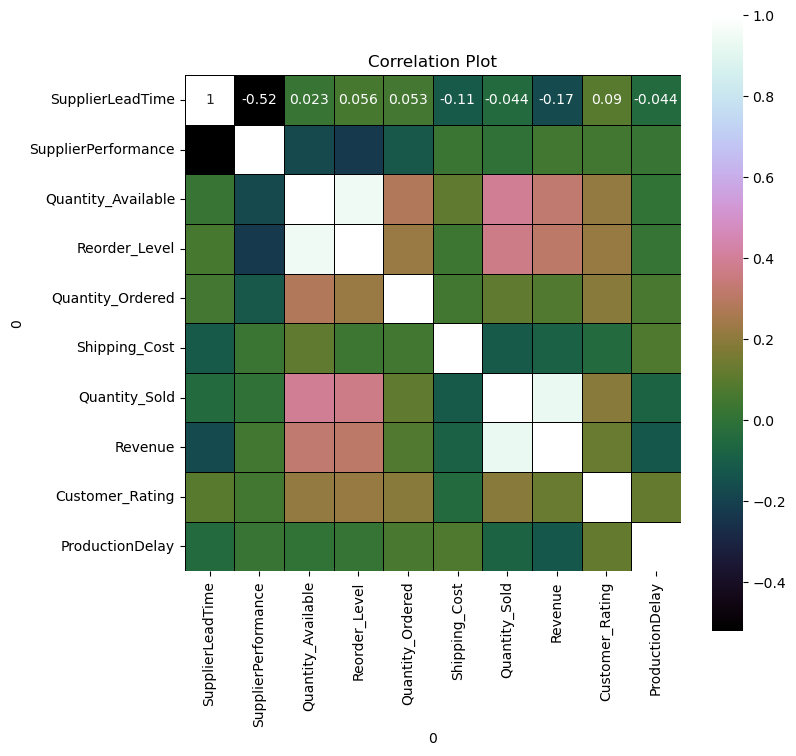

In [26]:
#Correlation Plot
corr=df.corr()

#Set the width and hieght of the plot
plt.figure(figsize=(8,8))
#Plot using seaborn library
plt.title('Correlation Plot')
correlation_plot = sns.heatmap(corr, linewidths=0.4,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

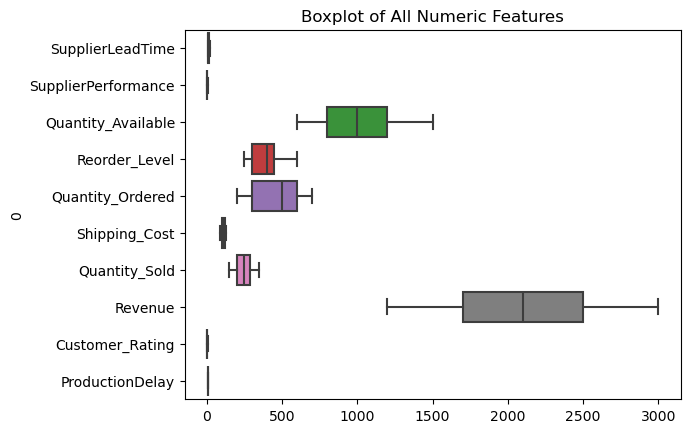

In [27]:
# Identify trends and outliers
sns.boxplot(data=df, orient="h")
plt.title("Boxplot of All Numeric Features")
plt.show()

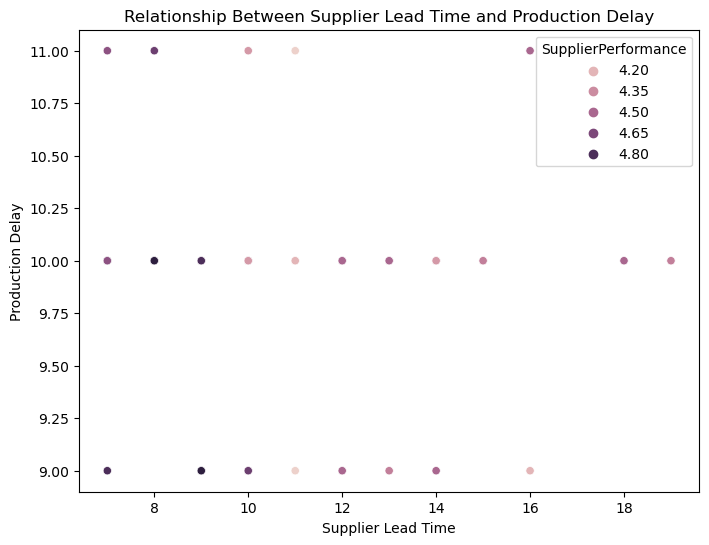

In [28]:
# Analyze specific relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="SupplierLeadTime", y="ProductionDelay", hue="SupplierPerformance")
plt.title("Relationship Between Supplier Lead Time and Production Delay")
plt.xlabel("Supplier Lead Time")
plt.ylabel("Production Delay")
plt.show()


## MODELLING

In [30]:
# # Machine Learning Model for Demand Prediction

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Feature selection (replace 'Feature1', 'Feature2', etc., with actual column names)
# X = df[["InventoryLevels", "ShipmentTimes", "HistoricalSales"]]  # Independent variables
# y = df["DemandForecast"]  # Target variable

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a Random Forest model
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")

# # Feature importance
# importance = model.feature_importances_
# for i, col in enumerate(X.columns):
#     print(f"Feature: {col}, Importance: {importance[i]}")


In [31]:
# # Deep Learning Model for Forecasting Production Lead Times

# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM

# # Preparing the data for Deep Learning
# X = df[["SupplierLeadTime", "OrderSize", "ProductionComplexity"]].values  # Independent variables
# y = df["ProductionLeadTime"].values  # Target variable

# # Normalize data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Reshape data for LSTM (if necessary)
# X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
# X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# # Build the LSTM model
# model = Sequential([
#     LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
#     Dense(1)
# ])

# model.compile(optimizer='adam', loss='mse')
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# # Predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print(f"Deep Learning Model Mean Squared Error: {mse}")


In [32]:
# # Statistical Modeling for Supplier Analysis

# import statsmodels.api as sm

# # Supplier performance regression model
# X = df[["SupplierLeadTime", "ShipmentReliability", "Cost"]]
# y = df["SupplierPerformance"]

# # Add a constant for the intercept
# X = sm.add_constant(X)

# # Fit the regression model
# model = sm.OLS(y, X).fit()
# print(model.summary())


***To predict demand and optimize inventory levels, the target variable depends on the specific goal of analysis:***

***1. For Demand Prediction:***<br>
The target variable is likely Quantity_Ordered, which represents the quantity demanded in an order.<br>
If you're forecasting future sales, Quantity_Sold might be a better target, as it directly reflects historical demand.<br>

***2. For Inventory Optimization:***<br>
While inventory optimization isn't typically predictive, it requires understanding:<br>
Quantity_Available: `Current stock levels`.<br>
Reorder_Level: `Minimum inventory level` before reordering.<br>
Demand Forecast (predicted `Quantity_Ordered` or `Quantity_Sold`): Helps calculate reorder quantities and safety stock.



***Key Steps for Predicting Demand and Optimizing Inventory:***
***1. Select the Target Variable***
Choose either Quantity_Ordered (if predicting order patterns) or Quantity_Sold (if forecasting sales trends).

***2. Feature Selection***
Use relevant features to predict the target:<br>
To predict demand (Quantity_Sold), you need to consider features that can impact demand, such as:

- Supplier Information: Supplier_ID, SupplierPerformance, SupplierLeadTime, Location
- Product Details: Product_ID, Product_Name, Material_Type
- Inventory Levels: Quantity_Available, Reorder_Level
- Sales and Shipment Timing: Order_Date, Shipping_Date, Completion_Date
- Financial Data: Revenue, Shipping_Cost
- Customer Feedback: Customer_Rating


***3. Prepare the Dataset***
Filter for rows with non-null values in the target variable.<br>
Create time-based features like month, day, and season from Order_Date or Sale_Date.




In [35]:
# Code to Identify Demand Patterns:
# Data Preparation:
# Convert dates to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])

# Extract temporal features
df['Year'] = df['Sale_Date'].dt.year
df['Month'] = df['Sale_Date'].dt.month
df['DayOfWeek'] = df['Sale_Date'].dt.dayofweek

# Aggregate demand by product and time
demand_data = df.groupby(['Product_ID', 'Year', 'Month'])['Quantity_Sold'].sum().reset_index()

# Inspect the aggregated data
print(demand_data.head())


  Product_ID  Year  Month  Quantity_Sold
0     INV006  2024      1            300
1     INV006  2024      2              0
2     INV006  2024      3              0
3     INV006  2024      4              0
4     INV007  2024      1            150


### Model Development:
Train a regression model with features and Quantity_Sold as the target variable.
Use libraries like scikit-learn for machine learning or statsmodels for statistical forecasting (e.g., ARIMA).

***Train-Test Split***<br>
Split data into training and testing datasets.

***Model Selection***<br>
Regression Models: For continuous prediction (e.g., Linear Regression, Random Forest Regression).
Time-Series Models: For trends (e.g., ARIMA, LSTM).

***Inventory Optimization***
Calculate reorder quantity using demand forecasts.<br>
Apply inventory management techniques like EOQ (Economic Order Quantity) or safety stock calculations.

<!-- Optimizing Inventory Levels:
After predicting demand (Quantity_Sold):

Calculate Safety Stock: Account for demand variability and lead time.
Reorder Point: Set the inventory level at which new stock is ordered.
Formula: Reorder Point = (Lead Time * Average Daily Demand) + Safety Stock
Economic Order Quantity (EOQ): Optimize order sizes to balance holding and ordering costs.
This process will ensure inventory levels are sufficient to meet predicted demand while minimizing costs. -->

In [38]:
# Select target and features
features = df[['SupplierLeadTime', 'SupplierPerformance', 'Material_Type', 
               'Quantity_Available', 'Reorder_Level', 'Region', 'Customer_Rating']]
target = df['Quantity_Ordered']

# Handle categorical variables
features = pd.get_dummies(features, columns=['Material_Type', 'Region'], drop_first=True)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a regression model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")


Mean Squared Error: 31663.0


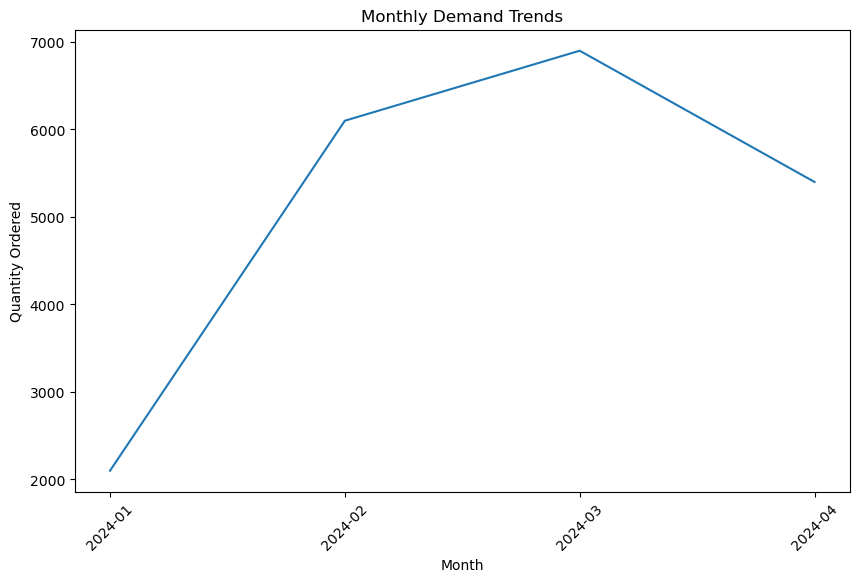

In [39]:
#Visualizing Demand Trends
# Aggregate sales by month
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Month'] = df['Order_Date'].dt.to_period('M')

monthly_demand = df.groupby('Month')['Quantity_Ordered'].sum().reset_index()

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(monthly_demand['Month'].astype(str), monthly_demand['Quantity_Ordered'])
plt.title('Monthly Demand Trends')
plt.xlabel('Month')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.show()


## To build a model for forecasting sales trends and demand, follow these steps:

***step 1: Data Preparation***
Aggregate sales data (Quantity_Sold) over time for trend analysis.<br>
Use time-based features like Order_Date, Sale_Date, Year, Month, and DayOfWeek.

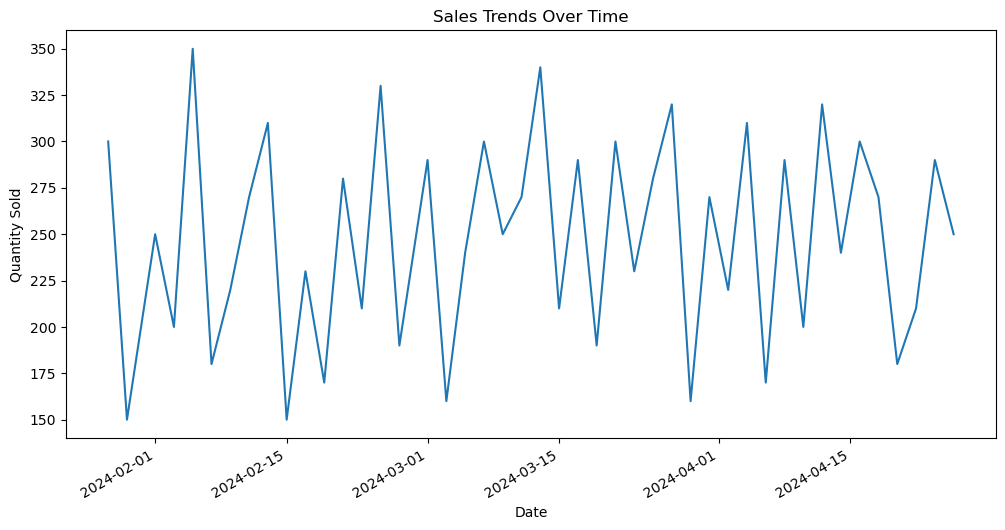

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date columns to datetime
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])

# Aggregate sales data for demand forecasting
sales_data = df.groupby(['Sale_Date'])['Quantity_Sold'].sum().reset_index()

# Set date as index (required for time series models)
sales_data.set_index('Sale_Date', inplace=True)

# Plot sales trends
plt.figure(figsize=(12, 6))
sales_data['Quantity_Sold'].plot()
plt.title("Sales Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.show()


***Step 2: Feature Engineering***
Add features such as:

Lag features: Previous demand values.
Rolling averages: Capture trends over time.
Seasonality indicators: Month, day of the week, holidays, etc.

In [43]:
# Code for Feature Engineering:
# Create lag features
sales_data['Lag_1'] = sales_data['Quantity_Sold'].shift(1)
sales_data['Lag_7'] = sales_data['Quantity_Sold'].shift(7)

# Create rolling averages
sales_data['Rolling_7'] = sales_data['Quantity_Sold'].rolling(window=7).mean()
sales_data['Rolling_30'] = sales_data['Quantity_Sold'].rolling(window=30).mean()

# Drop missing values (caused by lag/rolling features)
sales_data.dropna(inplace=True)

# Reset index for model input
sales_data.reset_index(inplace=True)

# Add date-based features
sales_data['Month'] = sales_data['Sale_Date'].dt.month
sales_data['DayOfWeek'] = sales_data['Sale_Date'].dt.dayofweek

print(sales_data.head())


   Sale_Date  Quantity_Sold  Lag_1  Lag_7   Rolling_7  Rolling_30  Month  \
0 2024-03-27            320  280.0  340.0  260.000000  248.666667      3   
1 2024-03-29            160  320.0  210.0  252.857143  244.000000      3   
2 2024-03-31            270  160.0  290.0  250.000000  248.000000      3   
3 2024-04-02            220  270.0  190.0  254.285714  247.000000      4   
4 2024-04-04            310  220.0  300.0  255.714286  250.666667      4   

   DayOfWeek  
0          2  
1          4  
2          6  
3          1  
4          3  


***Step 3: Train-Test Split***

In [45]:
# Define features and target variable
X = sales_data[['Lag_1', 'Lag_7', 'Rolling_7', 'Rolling_30', 'Month', 'DayOfWeek']]
y = sales_data['Quantity_Sold']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 4: Model Selection
### 1. Machine Learning Approach (Random Forest Regressor)

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Random Forest RMSE: {rmse}")


Random Forest RMSE: 69.21661650210879


### 2. Time Series Approach (ARIMA/SARIMA)

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


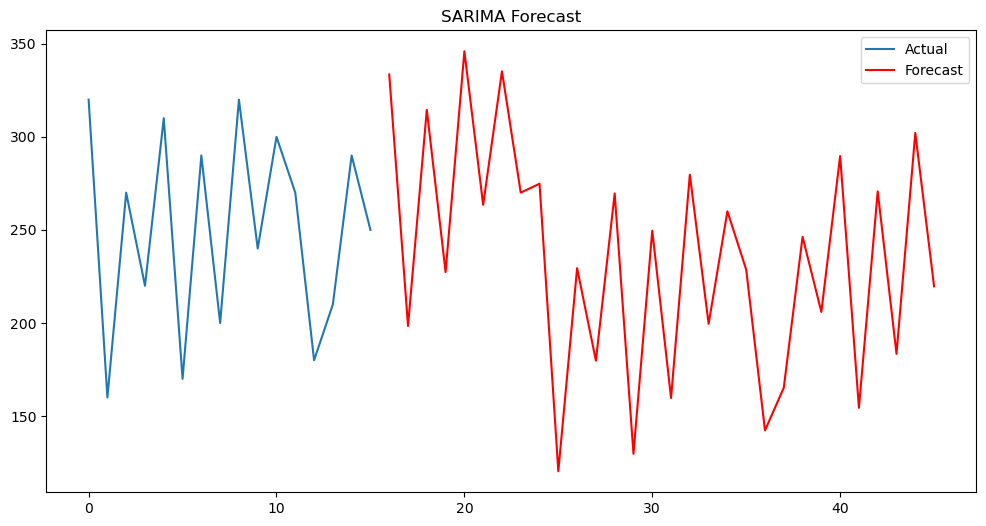

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a SARIMA model
sarima_model = SARIMAX(sales_data['Quantity_Sold'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecast future values
forecast = sarima_result.forecast(steps=30)

# Plot forecast vs actual
plt.figure(figsize=(12, 6))
sales_data['Quantity_Sold'].plot(label='Actual')
forecast.plot(label='Forecast', color='red')
plt.title("SARIMA Forecast")
plt.legend()
plt.show()


### 3. Deep Learning Approach (LSTM)